In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
print("Measurement Info:")
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

print("")
print("--------------")
print("")
print("Station info:")

    
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

Measurement Info:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

--------------

Station info:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [34]:
# Design a query to retrieve the last 12 months of precipitation data
last_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
# last_date = '2017-08-23'

prcp_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23", Measurement.date <= "2017-08-23").all()

prp_df = pd.DataFrame(prcp_query, columns=['date', 'precipitation'])

prp_df_clean = prp_df.sort_values('date').dropna()
prp_df_clean

,date,precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


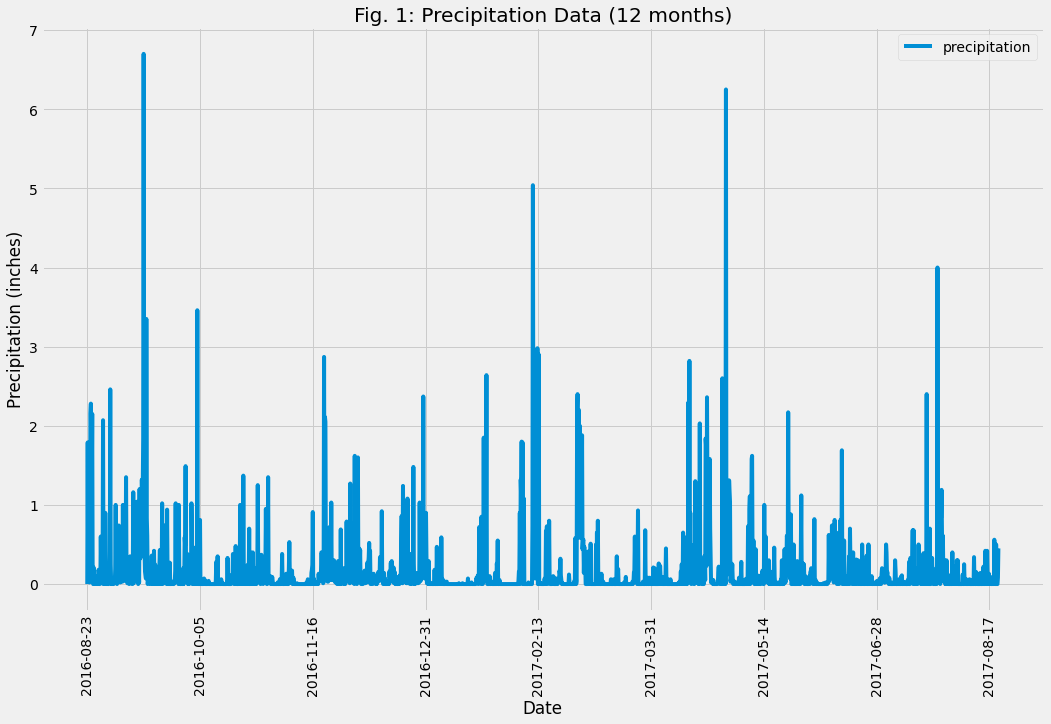

In [51]:
# Plot the results
prp_df_clean.plot(x='date', y='precipitation', rot=90, figsize =(16, 10))
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
plt.title("Fig. 1: Precipitation Data (12 months)")
plt.legend(loc = "upper right")

In [28]:
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print("Query Date: ", last_year)

Query Date:  2016-08-23


In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prp_df_clean.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [134]:
# Design a query to show how many stations are available in this dataset?
len(session.query(Station.station).all())

9

In [138]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [139]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_tobs = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

station_tobs

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [143]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_activity = session.query(Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.station == 'USC00519281').all()
#tobs_activity

In [141]:
tobs_df = pd.DataFrame(tobs_activity)
tobs_df

,0,1
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


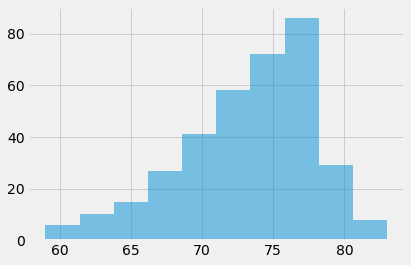

In [153]:
x = [tobs_df[1]]
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, alpha=0.5)
plt.show()